<h1>Polynomial Regression Results Analysis</h1>
<p>Experiment objective: To demonstrate how polynomial regression works with non-linear data</p>
<p>Key metrics for evaluating results: MSE, R², comparison of the true dependency versus the dependency found by the model</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

<h2>Creating Synthetic Data</h2>

<p>Creating 200 points from -3 to 3 in variable X and immediately reshaping it from a 1D array of 200 values into 200 rows with 1 column.</p>
<p>After that, creating 200 points in variable y. Adding a small amount of noise.</p>

In [3]:
np.random.seed(42)
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.normal(0, 1, (200, 1))

<h2>Splitting Data into Training and Testing Sets</h2>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Creating a Pipeline</h2>
<p>In the pipeline, we create new columns with powers of X, as well as a Linear Regression model.</p>

In [5]:
model = Pipeline([
    ('Poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

<h2>Training the Model</h2>

In [6]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('Poly', ...), ('linear', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


<h2>Evaluating Model Performance on Test Data</h2>

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = model.named_steps['linear'].coef_.flatten()
intercept = model.named_steps['linear'].intercept_[0]

<h2>Final Step: Plotting the Polynomial Regression Results and Evaluation Metrics</h2>

Text(0, 0.5, 'y')

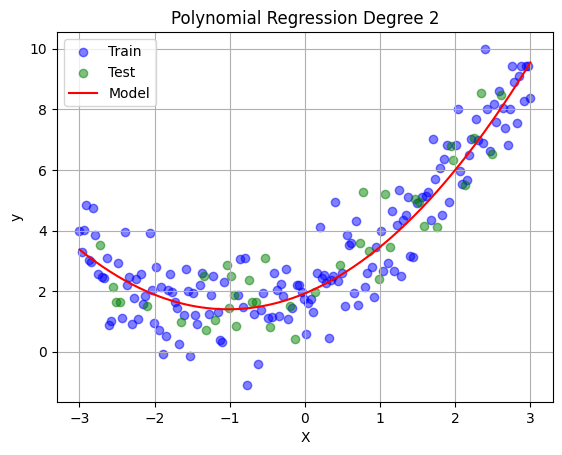

In [15]:
X_smooth = np.linspace(-3, 3, 300).reshape(-1, 1)
y_smooth = model.predict(X_smooth)

plt.title("Polynomial Regression Degree 2")

plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='blue')
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='green')
plt.plot(X_smooth, y_smooth, label='Model', color='red')
plt.grid(True)


plt.legend()

plt.xlabel('X')
plt.ylabel('y')

In [10]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Coefficient of Determination (R²): {r2:.4f}")
print(f"Model Coefficients: {coef}")
print(f"Bias (Intercept): {intercept:.4f}")

Mean Squared Error (MSE): 0.7748
Coefficient of Determination (R²): 0.8339
Model Coefficients: [1.02810589 0.50346843]
Bias (Intercept): 1.9262


<h2>Residual Analysis</h2>

<p>To further validate the model's performance, let's analyze the residuals (errors) - the differences between actual and predicted values. A good regression model should have residuals that are randomly distributed around zero with constant spread.</p>


Residual Statistics:
Mean: 0.1124
Standard Deviation: 0.8730
Minimum: -1.3860
Maximum: 2.2406


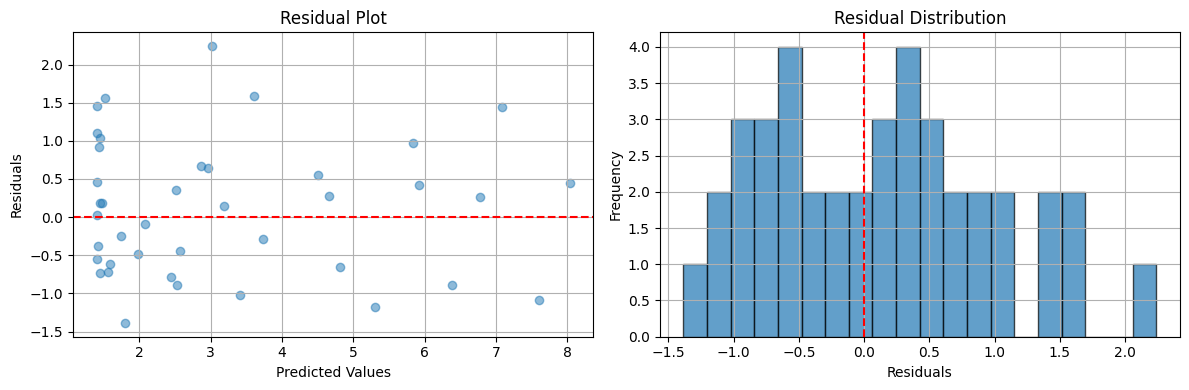

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)

plt.tight_layout()

print(f"\nResidual Statistics:")
print(f"Mean: {np.mean(residuals):.4f}")
print(f"Standard Deviation: {np.std(residuals):.4f}")
print(f"Minimum: {np.min(residuals):.4f}")
print(f"Maximum: {np.max(residuals):.4f}")

<h3>Residual Analysis Interpretation:</h3>

<p>The residual mean is very close to zero 0.1124, indicating that the model makes unbiased predictions. The random scatter in the residual plot (no clear patterns or funnel shape) confirms that the quadratic model captured the relationship well and that the variance is constant (homoscedasticity). The histogram shows an approximately normal distribution of errors, which validates the statistical assumptions of linear regression.</p>

<h2>Conclusions</h2>

<p>This experiment successfully demonstrated the application of polynomial regression to model non-linear data. The key takeaways are:</p>
<ul>
<li><b>Performance:</b> The model achieved a low Mean Squared Error (MSE) and a high R² score, indicating a strong fit to the test data.</li>
<li><b>Pattern Recognition:</b> By using degree-2 polynomial features, the model was able to capture the underlying quadratic relationship between X and Y, as visualized by the red curve on the plot.</li>
<li><b>Interpretability:</b> The learned coefficients [1.028, 0.503] closely resemble the true data-generating process (y ≈ 1.9262 + 1.028*X + 0.5*X²), confirming the model's ability to recover the ground truth from noisy data. The slight deviation from the true values (2, 1, and 0.5) is due to the random noise added to the dataset.</li>
<li><b>Limitation:</b> This method requires choosing the degree beforehand. While degree 2 worked well here, the wrong choice could lead to underfitting or overfitting.</li>

</ul> <p>Overall, polynomial regression proved to be a simple yet effective tool for extending linear models to capture curvature in data.</p>